## Exploratory Data Analysis: League of Legends Ranked Games

Exploring interesting insights w/ respect to game duration, champion bans, summoner spells, and micro game stats

#### Import Modules/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

#### Load CSV's to dataframes

In [2]:
duration = 'duration.csv'
duration_df = pd.read_csv(duration)
duration_df = duration_df[['Region', 'Season', 'Duration']]

participants_SS = 'participants_SS.csv'
participants_SS_df = pd.read_csv(participants_SS)
participants_SS_df = participants_SS_df.iloc[:,1:]

micro_stats = 'micro_stats.csv'
micro_stats_df = pd.read_csv(micro_stats, low_memory=False)
micro_stats_df = micro_stats_df.iloc[:, 1:]

bans = 'bans.csv'
bans_df = pd.read_csv(bans)
bans_df = bans_df.iloc[:,1:]

macro_stats = 'macro_stats.csv'
macro_stats_df = pd.read_csv(macro_stats)
macro_stats_df = macro_stats_df.iloc[:, 1:]

### Duration Analysis

In [3]:
duration_df.Duration.describe() # look at summary statistics

count    184069.000000
mean         18.328571
std           5.097422
min           1.900000
25%          15.410000
50%          18.370000
75%          21.450000
max          49.910000
Name: Duration, dtype: float64

##### Looks like the duration across all regions through each season follows relatively a normal distribution. But let's see if this is actually the case across each, region through each season.

##### But first, let's create an ECDF plot

In [4]:
def ecdf(data): # Create ecdf function

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

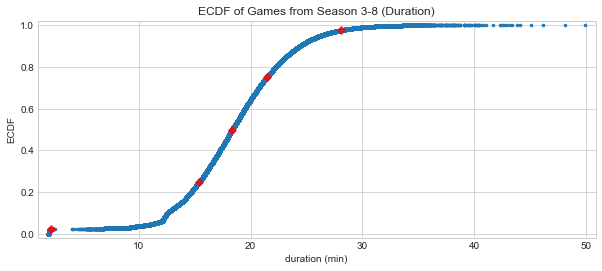

In [5]:
sns.set_style('whitegrid') # Set plot theme
plt.figure(figsize=(10,4)) # Set size

x_duration, y_duration = ecdf(duration_df.Duration) # Unzip x and y

_ = plt.plot(x_duration, y_duration, marker='.', linestyle='none', markersize=5)  # Scatter plot

percentiles = np.array([2.5, 25, 50, 75, 97.5]) # Specify array of percentiles: percentiles

percentiles_duration = np.percentile(duration_df.Duration, percentiles) # Compute percentiles: ptiles_vers

_ = plt.plot(percentiles_duration, percentiles/100, marker='D', color='red',
                 linestyle='none', alpha=.75, markersize =5)

plt.margins(0.02) # Make the margins nice

_ = plt.xlabel('duration (min)') # Label the axes
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Games from Season 3-8 (Duration)')

# Display the plot
plt.show()

##### With changes implemented into the game through weekly patches, Riot Games (creator of League of Legends) is constantly assessing every aspect of the game (from strength of champions, items, etc.) to keep a stable balance within the game. This is reflected accordingly in the normal distribution of the duration of games across all regions through each season as depicted in the ECDF plot above.

#### Let's see if this is consistent through each season/region by exploring the average/median

In [6]:
duration_mean_by_season = duration_df.groupby(by=['Season']).mean() # mean duration of games by season
duration_median_by_season = duration_df.groupby(by=['Season']).median() # median duration of games by season

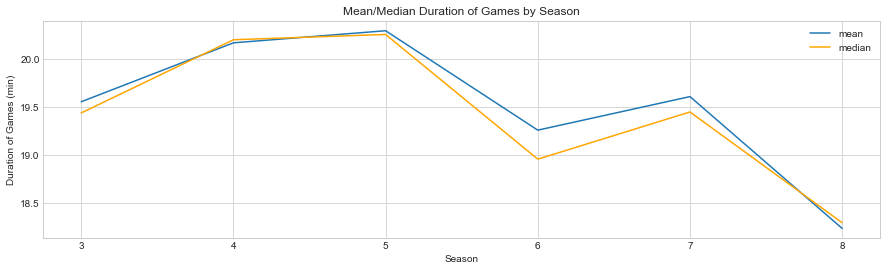

In [7]:
plt.figure(figsize=(15,4))
_ = plt.plot(duration_mean_by_season, label = 'mean') # plot mean duration of games by season
_ = plt.plot(duration_median_by_season, color= 'orange',label = 'median') # plot median duration of games by season
_ = plt.xlabel('Season') # label x-axis
_ = plt.ylabel('Duration of Games (min)') # label y-axis
_ = plt.title('Mean/Median Duration of Games by Season') # label title
_ = plt.legend() # insert legend

##### From the ECDF plot, I had expected the mean and median durations to be relatively close through each season. But season six shows a right skewed distribution for the duration of games which is quite significant and worth delving into. 

##### Let's explore further and look at each region, with respect to season, to see if there is a specific region that has games going lasting longer than the median duration.

In [8]:
# Mean/median duration by season and region
duration_mean_by_season_region = duration_df.groupby(by=['Season','Region']).mean() # mean duration of games by season
duration_median_by_season_region = duration_df.groupby(by=['Season','Region']).median() # median duration of games by season

# Splitting mean duration by season/region
EW_mean_duration = duration_mean_by_season_region.query('Region == "Europe West"').reset_index()
NA_mean_duration = duration_mean_by_season_region.query('Region == "North America"').reset_index()
EN_mean_duration = duration_mean_by_season_region.query('Region == "Europe North"').reset_index()
TK_mean_duration = duration_mean_by_season_region.query('Region == "Turkey"').reset_index()

# Splitting median duration by season/region
EW_median_duration = duration_median_by_season_region.query('Region == "Europe West"').reset_index()
NA_median_duration = duration_median_by_season_region.query('Region == "North America"').reset_index()
EN_median_duration = duration_median_by_season_region.query('Region == "Europe North"').reset_index()
TK_median_duration = duration_median_by_season_region.query('Region == "Turkey"').reset_index()

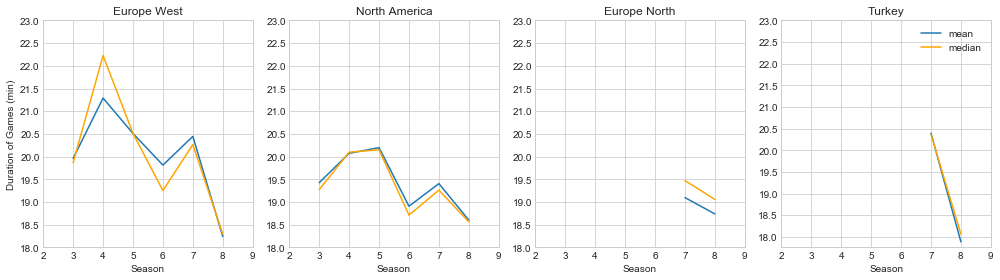

In [9]:
plt.figure(figsize=(14,4))
_ = plt.subplot(1,4,1)
_ = plt.plot(EW_mean_duration.Season, EW_mean_duration.Duration, label = 'mean') # plot mean duration of games by season
_ = plt.plot(EW_median_duration.Season,EW_median_duration.Duration, color= 'orange',label = 'median') # plot median duration of games by season
_ = plt.xlabel('Season') # label x-axis
_ = plt.ylabel('Duration of Games (min)') # label y-axis
_ = plt.xlim([3,8])
_ = plt.xticks([2,3,4,5,6,7,8,9])
_ = plt.yticks([18,18.5,19,19.5,20,20.5,21,21.5, 22, 22.5,23])
_ = plt.title('Europe West')


_ = plt.subplot(1,4,2)
_ = plt.plot(NA_mean_duration.Season, NA_mean_duration.Duration, label = 'mean') # plot mean duration of games by season
_ = plt.plot(NA_median_duration.Season,NA_median_duration.Duration,color='orange', label = 'median') # plot median duration of games by season
_ = plt.xlabel('Season') # label x-axis
_ = plt.xlim([3,8])
_ = plt.xticks([2,3,4,5,6,7,8,9])
_ = plt.yticks([18,18.5,19,19.5,20,20.5,21,21.5, 22, 22.5,23])
_ = plt.title('North America')

_ = plt.subplot(1,4,3)
_ = plt.plot(EN_mean_duration.Season, EN_mean_duration.Duration, label = 'mean') # plot mean duration of games by season
_ = plt.plot(EN_median_duration.Season,EN_median_duration.Duration,color='orange', label = 'median') # plot median duration of games by season
_ = plt.xlabel('Season') # label x-axis
_ = plt.xlim([3,8])
_ = plt.xticks([2,3,4,5,6,7,8,9])
_ = plt.yticks([18,18.5,19,19.5,20,20.5,21,21.5, 22, 22.5,23])
_ = plt.title('Europe North')

_ = plt.subplot(1,4,4)
_ = plt.plot(TK_mean_duration.Season, TK_mean_duration.Duration, label = 'mean') # plot mean duration of games by season
_ = plt.plot(TK_median_duration.Season,TK_median_duration.Duration, color='orange',label = 'median') # plot median duration of games by season
_ = plt.xlabel('Season') # label x-axis
_ = plt.xlim([3,8])
_ = plt.xticks([2,3,4,5,6,7,8,9])
_ = plt.yticks([18,18.5,19,19.5,20,20.5,21,21.5, 22, 22.5,23])
_ = plt.legend(loc = 'best')
_ = plt.title('Turkey')

_ = plt.tight_layout()


##### North America and Turkey looks like the most consistent in terms of a normal distribution w/ respect to duration of games. Since Europe North has only started it's servers in Season 7, this may be noteworthy to exclude it's data later on because of the server's immaturity. As for Europe West, it looks like a very interesting region to further delve into later on especially between season 4 through season 6. We may find significant reasons why there were more shorter games relative to the median in season 4 and then the transition to longer games relative to the median in season 6 (champions picks/bans, strategies, skill level relative to rest of regions, etc.)

##### Now let's look at a box plot of each region to get a simpler view of the spread of duration for games.

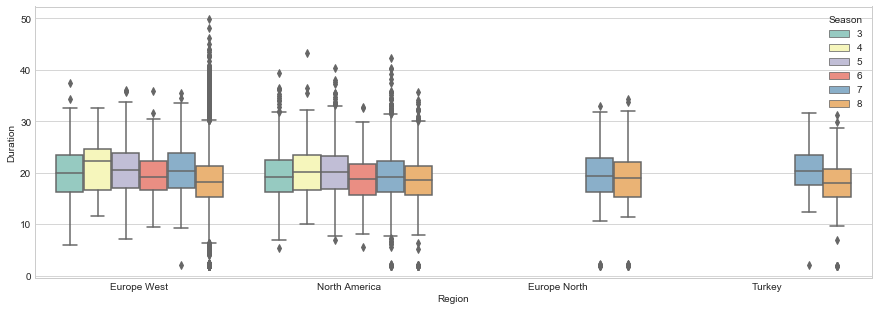

In [10]:
plt.figure(figsize=(15,5)) # Enlarge size
sns.boxplot(x="Region", y="Duration", hue= 'Season',data = duration_df, palette="Set3") # Plot boxplots

##### It is pretty clear within the Europe West, throughout each season, it is either left skewed/right skewed which further strenghtens that there are some factors to be uncovered within Europe West on why the durations are skewed relative to other regions. 

##### In conclusion, after exploring the duration dataset, there is huge potential in exploring Europe West and even North America that may shed some light on the distinct characteristics that may have caused the inconsistent duration of games relative to the other regions.

### Participants Analysis

In [11]:
SS = pd.melt(participants_SS_df, id_vars=["Match ID","Position"], # Melt dataframe
        value_vars=["SS1", "SS2"], value_name="SS") 

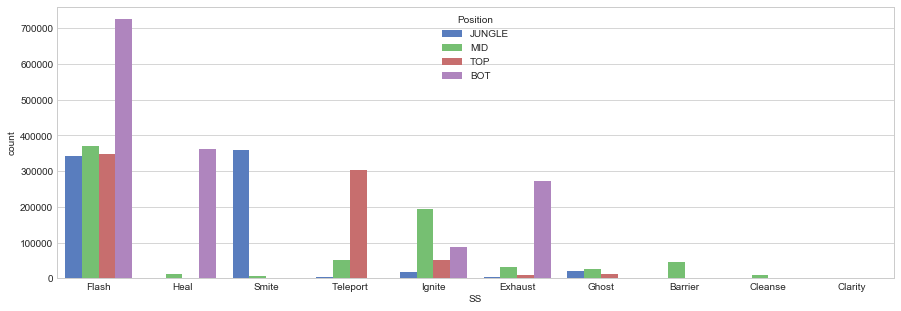

In [12]:
plt.figure(figsize=(15,5)) # Plot bar chart to compare each summoner spell by position
sns.countplot(x="SS", hue = 'Position', data=SS, palette = 'muted',
                  order = SS['SS'].value_counts().index)

##### From the bar chart above, overwhelmingly, each position takes flash as one of their summoner spell from every lane. When playing a specific position, one can get a general census of their roles's summoner spell using this chart (there are exceptions and special cases, as always).

### Champion Ban Analysis

In [13]:
bans_df.head()

,Match ID,Ban Turn,Champion
0,10,1,Master Yi
1,10,6,Fizz
2,10,4,Braum
3,10,2,Akali
4,10,5,Hecarim


Text(0.5,1,'Top Ten Banned Champions (Season 3-8)')

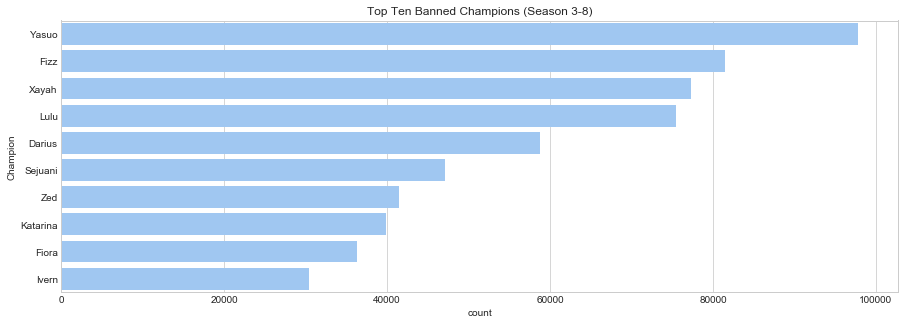

In [14]:
plt.figure(figsize=(15,5)) # Plot bar chart to compare each summoner spell by position
sns.set_color_codes("pastel") # set color palette
sns.countplot(y="Champion", data=bans_df, color= 'b', orient = 'v', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:10])
plt.title('Top Ten Banned Champions (Season 3-8)')


In [15]:
bans = bans_df.rename(index = str, columns = {"Ban Turn":'Turn'}) # Rename column

# Create six dataframes by turn
ban1 = bans.query('Turn == "1"') 
ban2 = bans.query('Turn == "2"')
ban3 = bans.query('Turn == "3"')
ban4 = bans.query('Turn == "4"')
ban5 = bans.query('Turn == "5"')
ban6 = bans.query('Turn == "6"')

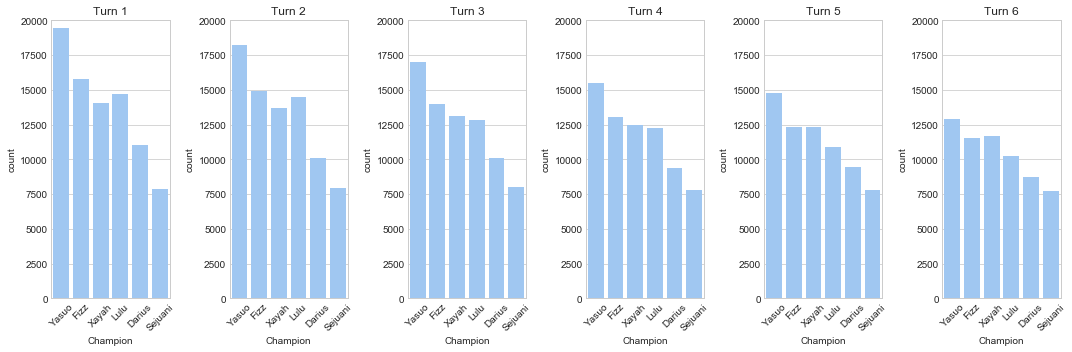

In [16]:
plt.figure(figsize=(15,5)) # Plot bar chart to compare top bans by turn

_ = plt.subplot(1,6,1)
sns.countplot(x="Champion", data=ban1, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
_ = plt.ylabel('count') # label y-axis
_ =plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 1')

_ = plt.subplot(1,6,2)
sns.countplot(x="Champion", data=ban2, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
_ = plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 2')

_ = plt.subplot(1,6,3)
sns.countplot(x="Champion", data=ban3, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 3')

_ = plt.subplot(1,6,4)
sns.countplot(x="Champion", data=ban4, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
_ = plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 4')

_ = plt.subplot(1,6,5)
sns.countplot(x="Champion", data=ban5, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
_ = plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 5')

_ = plt.subplot(1,6,6)
sns.countplot(x="Champion", data=ban6, color= 'b', # Create bar chart
                  order = bans_df['Champion'].value_counts().index[:6])
_ = plt.xlabel('Champion') # label x-axis
_ =plt.xticks(rotation=45)
_ = plt.ylim([0,20000])
_ = plt.title('Turn 6')

_ = plt.tight_layout()

#####  Quite interesting and significant that the top 6 banned champions overall are the same top champions banned in each turn, in the same order...

### Analysis the Micro Game

In [17]:
micro_stats_df.head(3) # Look at first few records

,id,win,kills,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,6,69,42,27,610,13,0,0,10,0,0
1,10,0,0,1,1,0,211,14,1,0,17,3,0
2,11,0,7,3,1,2,182,14,1,0,13,5,0


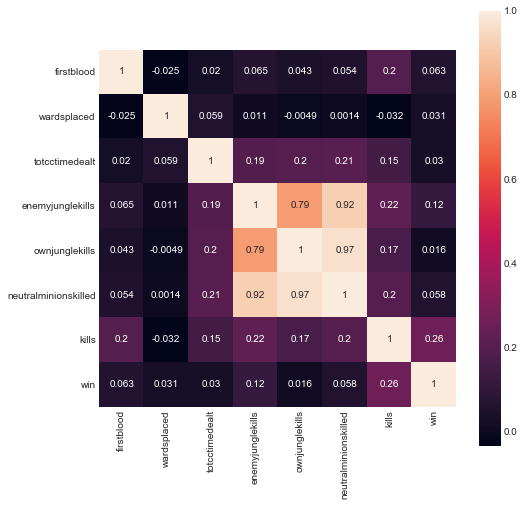

In [18]:
fig = plt.figure(figsize=(8,8)) # Look at potential predictor variables for a win
sns.heatmap(micro_stats_df[['firstblood','wardsplaced','totcctimedealt','enemyjunglekills',
                  'ownjunglekills','neutralminionskilled','kills','win']].corr(),annot=True,square=True)

##### As you can see above, no variables in the micro game have a high correlation with a win in League of Legends. The only high correlation within the heat map is between dependent variables and thus, should be addressed as duplicate variables. When you kill a neutral minion, you are also technically killing an enemy jungle minion as well as your own jungle minion. Thus, the high correlation in the heat map should be ignored.

### This is quite interesting because we do have a macro dataset that is waiting to be explored. Stay tuned to find out more...!

In [22]:
macro_stats_df.head()

,t1_towerKills,t1_inhibitorKills,t1_dragonKills,t1_baronKills,t2_towerKills,t2_inhibitorKills,t2_dragonKills,t2_baronKills,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,winner
0,11,1,3,2,5,0,1,0,2,1,1,1,1,2,1
1,10,4,2,0,2,0,0,0,1,1,1,0,1,1,1
2,8,1,1,1,2,0,1,0,2,1,1,1,2,0,1
3,9,2,2,1,0,0,0,0,1,1,1,1,1,0,1
4,9,2,3,1,3,0,1,0,2,1,1,1,1,0,1
